In [5]:
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import pandas as pd
houses = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/houses.csv')

Mounted at /content/drive


#A)

In [6]:
houses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

#B)

In [7]:
houses.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#C)

In [8]:
import matplotlib.pyplot as plt

corr = houses.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  after removing the cwd from sys.path.


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.00,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01,-0.01,-0.01,0.02,-0.02,-0.01,-0.00,0.02,-0.00,-0.14
price,-0.02,1.00,0.31,0.53,0.70,0.09,0.26,0.27,0.40,0.04,0.67,0.61,0.32,0.05,0.13,-0.05,0.31,0.02,0.59,0.08
bedrooms,0.00,0.31,1.00,0.52,0.58,0.03,0.18,-0.01,0.08,0.03,0.36,0.48,0.30,0.15,0.02,-0.15,-0.01,0.13,0.39,0.03
bathrooms,0.01,0.53,0.52,1.00,0.75,0.09,0.50,0.06,0.19,-0.12,0.66,0.69,0.28,0.51,0.05,-0.20,0.02,0.22,0.57,0.09
sqft_living,-0.01,0.70,0.58,0.75,1.00,0.17,0.35,0.10,0.28,-0.06,0.76,0.88,0.44,0.32,0.06,-0.20,0.05,0.24,0.76,0.18
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1.00,-0.01,0.02,0.07,-0.01,0.11,0.18,0.02,0.05,0.01,-0.13,-0.09,0.23,0.14,0.72
floors,0.02,0.26,0.18,0.50,0.35,-0.01,1.00,0.02,0.03,-0.26,0.46,0.52,-0.25,0.49,0.01,-0.06,0.05,0.13,0.28,-0.01
waterfront,-0.00,0.27,-0.01,0.06,0.10,0.02,0.02,1.00,0.40,0.02,0.08,0.07,0.08,-0.03,0.09,0.03,-0.01,-0.04,0.09,0.03
view,0.01,0.40,0.08,0.19,0.28,0.07,0.03,0.40,1.00,0.05,0.25,0.17,0.28,-0.05,0.10,0.08,0.01,-0.08,0.28,0.07
condition,-0.02,0.04,0.03,-0.12,-0.06,-0.01,-0.26,0.02,0.05,1.00,-0.14,-0.16,0.17,-0.36,-0.06,0.00,-0.01,-0.11,-0.09,-0.00


#D)

Text(0, 0.5, 'prices')

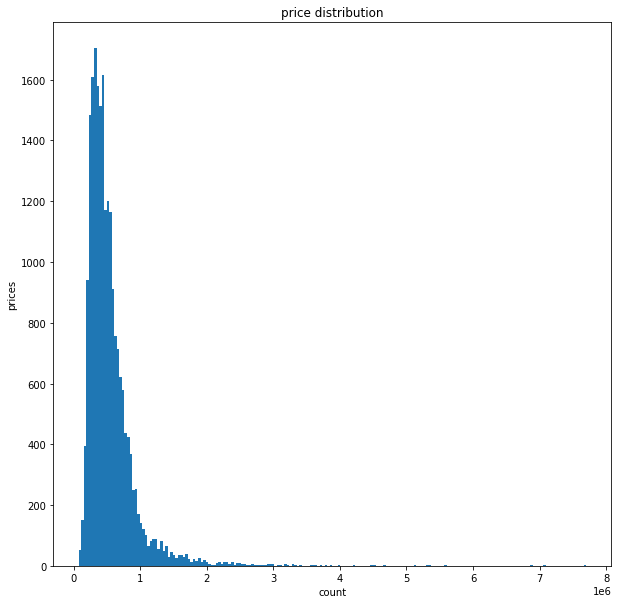

In [9]:
plt.figure(figsize=(10, 10))
dist = plt.hist(houses['price'], bins = 200)
plt.title('price distribution')
plt.xlabel('count')
plt.ylabel('prices')

Text(0, 0.5, 'prices')

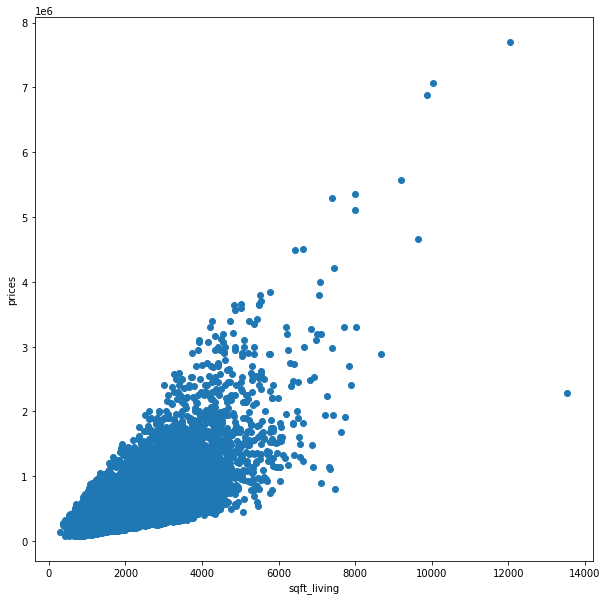

In [10]:
plt.figure(figsize=(10, 10))
x = houses['sqft_living']
y = houses['price']
plt.plot(x, y, 'o')
plt.xlabel('sqft_living')
plt.ylabel('prices')

#E)

In [11]:
housesupdate = houses.copy()
housesupdate['year'] = pd.DatetimeIndex(housesupdate['date']).year
housesupdate['month'] = pd.DatetimeIndex(housesupdate['date']).month
del housesupdate['date']
housesupdate

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,...,0,2009,0,98144,47.5944,-122.299,1020,2007,2014,6
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,...,0,2004,0,98027,47.5345,-122.069,1410,1287,2015,1


#E & F) 
it better to scale the data at first and then we can split it to train & test

In [12]:
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
#delete unnecessary features
del housesupdate['id']
#fit and transform hole data 
housesupdatescale = housesupdate.values
housesupdatescale = pd.DataFrame((Scaler.fit_transform(housesupdatescale)))


In [13]:
from sklearn.model_selection import train_test_split

X = housesupdatescale.iloc[:,1:21].values
y = housesupdatescale.iloc[:,0].values

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=32)
# Checkout the Data
print('Training data shape : ', X_train.shape, y_train.shape)
print('Testing data shape : ', X_test.shape, y_test.shape)
#df_train = pd.merge(X_train, y_train, how ='left', left_index=True, right_index=True)

Training data shape :  (17290, 20) (17290,)
Testing data shape :  (4323, 20) (4323,)


#F)

In [29]:
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(40, input_shape=(20,)))	#Hidden Layer 1
model.add(Dense(20))	#Hidden Layer 2
model.add(Dense(1)) #Last layer with one output for price
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 40)                840       
                                                                 
 dense_10 (Dense)            (None, 20)                820       
                                                                 
 dense_11 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


#I,J,k)
SGD optimizer

Epoch 1/15
1729/1729 [==============================] - 5s 3ms/step - loss: 0.0028 - mean_absolute_error: 0.0363 - mean_squared_error: 0.0028 - val_loss: 0.0013 - val_mean_absolute_error: 0.0249 - val_mean_squared_error: 0.0013
Epoch 2/15
1729/1729 [==============================] - 4s 3ms/step - loss: 0.0011 - mean_absolute_error: 0.0228 - mean_squared_error: 0.0011 - val_loss: 0.0010 - val_mean_absolute_error: 0.0216 - val_mean_squared_error: 0.0010
Epoch 3/15
1729/1729 [==============================] - 6s 3ms/step - loss: 9.6864e-04 - mean_absolute_error: 0.0209 - mean_squared_error: 9.6864e-04 - val_loss: 9.4360e-04 - val_mean_absolute_error: 0.0202 - val_mean_squared_error: 9.4360e-04
Epoch 4/15
1729/1729 [==============================] - 5s 3ms/step - loss: 8.9435e-04 - mean_absolute_error: 0.0198 - mean_squared_error: 8.9435e-04 - val_loss: 8.9138e-04 - val_mean_absolute_error: 0.0193 - val_mean_squared_error: 8.9138e-04
Epoch 5/15
1729/1729 [==============================] - 

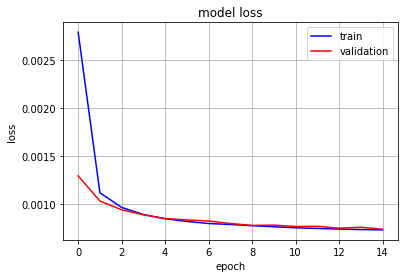

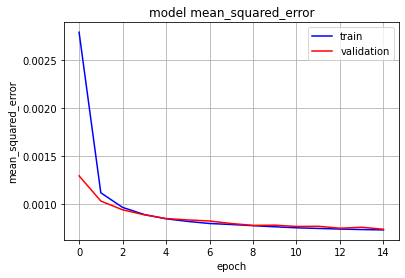

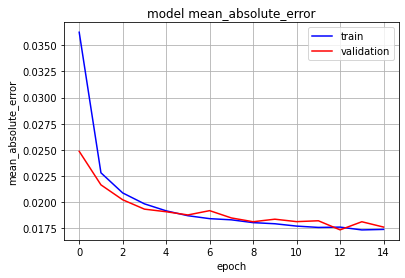

In [26]:
# Configure the Network
model.compile(loss='mean_squared_error', optimizer='SGD', metrics=['mean_absolute_error', 'mean_squared_error'])
fitting = model.fit(X_train, y_train, epochs=15, batch_size=8, validation_split=0.2)

# Plot the Loss finction for train & validation
fig = plt.figure()
plt.plot(fitting.history['loss'],'b')
plt.plot(fitting.history['val_loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()
# Plot the mean_squared_error
fig = plt.figure()
plt.plot(fitting.history['mean_squared_error'],'b')
plt.plot(fitting.history['val_mean_squared_error'],'r')
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()
# Plot the mean_squared_error
fig = plt.figure()
plt.plot(fitting.history['mean_absolute_error'],'b')
plt.plot(fitting.history['val_mean_absolute_error'],'r')
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

In [28]:
y_pred = model.predict(X_test)

import random
y_predr = list()
y_testr = list()
for i in range(5):
  j = random.randint(0, len(y_pred))
  y_predr.append(y_pred[i])
  y_testr.append(y_test[i])
  print (i,'.real value = ', y_test[i], 'predicted value = ', y_pred[i],'error = ',y_test[i] - y_pred[i] )

136/136 [==============================] - 0s 3ms/step
0 .real value =  0.03986885245901639 predicted value =  [0.05123062] error =  [-0.01136176]
1 .real value =  0.07107540983606557 predicted value =  [0.0870507] error =  [-0.01597529]
2 .real value =  0.047540983606557376 predicted value =  [0.06633762] error =  [-0.01879664]
3 .real value =  0.017311475409836068 predicted value =  [0.02662478] error =  [-0.0093133]
4 .real value =  0.10885245901639344 predicted value =  [0.12322875] error =  [-0.01437629]


adam optimizer

Epoch 1/15
1729/1729 [==============================] - 6s 3ms/step - loss: 0.0086 - mean_absolute_error: 0.0350 - mean_squared_error: 0.0086 - val_loss: 8.2875e-04 - val_mean_absolute_error: 0.0200 - val_mean_squared_error: 8.2875e-04
Epoch 2/15
1729/1729 [==============================] - 6s 3ms/step - loss: 9.0645e-04 - mean_absolute_error: 0.0207 - mean_squared_error: 9.0645e-04 - val_loss: 8.3650e-04 - val_mean_absolute_error: 0.0201 - val_mean_squared_error: 8.3650e-04
Epoch 3/15
1729/1729 [==============================] - 6s 3ms/step - loss: 0.0010 - mean_absolute_error: 0.0220 - mean_squared_error: 0.0010 - val_loss: 8.9658e-04 - val_mean_absolute_error: 0.0212 - val_mean_squared_error: 8.9658e-04
Epoch 4/15
1729/1729 [==============================] - 6s 4ms/step - loss: 9.4830e-04 - mean_absolute_error: 0.0208 - mean_squared_error: 9.4830e-04 - val_loss: 8.9396e-04 - val_mean_absolute_error: 0.0191 - val_mean_squared_error: 8.9396e-04
Epoch 5/15
1729/1729 [==================

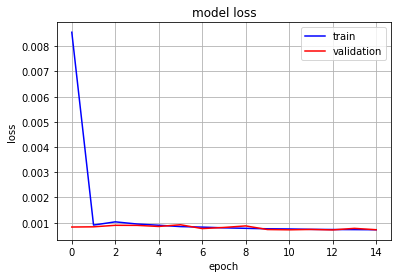

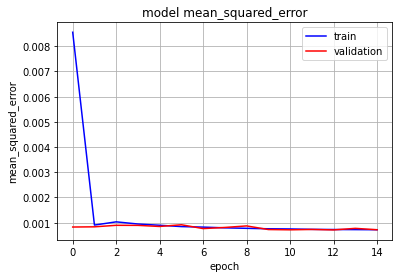

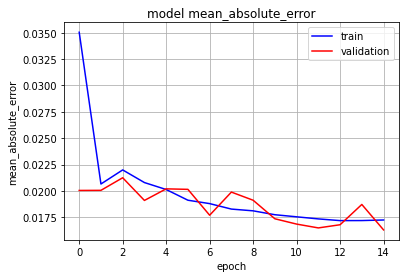

In [30]:
# Configure the Network
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error', 'mean_squared_error'])
fitting = model.fit(X_train, y_train, epochs=15, batch_size=8, validation_split=0.2)

# Plot the Loss finction for train & validation
fig = plt.figure()
plt.plot(fitting.history['loss'],'b')
plt.plot(fitting.history['val_loss'],'r')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()
# Plot the mean_squared_error Curves
fig = plt.figure()
plt.plot(fitting.history['mean_squared_error'],'b')
plt.plot(fitting.history['val_mean_squared_error'],'r')
plt.title('model mean_squared_error')
plt.ylabel('mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()
# Plot the mean_squared_error Curves
fig = plt.figure()
plt.plot(fitting.history['mean_absolute_error'],'b')
plt.plot(fitting.history['val_mean_absolute_error'],'r')
plt.title('model mean_absolute_error')
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.grid()

In [31]:
y_pred = model.predict(X_test)

import random
y_predr = list()
y_testr = list()
for i in range(5):
  j = random.randint(0, len(y_pred))
  y_predr.append(y_pred[i])
  y_testr.append(y_test[i])
  print (i,'.real value = ', y_test[i], 'predicted value = ', y_pred[i],'error = ',y_test[i] - y_pred[i] )

136/136 [==============================] - 0s 2ms/step
0 .real value =  0.03986885245901639 predicted value =  [0.05728087] error =  [-0.01741202]
1 .real value =  0.07107540983606557 predicted value =  [0.0817831] error =  [-0.01070769]
2 .real value =  0.047540983606557376 predicted value =  [0.06222624] error =  [-0.01468525]
3 .real value =  0.017311475409836068 predicted value =  [0.02613772] error =  [-0.00882624]
4 .real value =  0.10885245901639344 predicted value =  [0.11576498] error =  [-0.00691251]
